In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import slugger as slug
import pandas as pd

params = {'text.usetex': False, 'mathtext.fontset': 'stix'}
plt.rcParams.update(params)
%matplotlib inline

In [2]:
def plot_cont(ax, data, vlim, draw_cb=True):

    # plot dens
    var = 'dens'

    # get variable data
    var_data = slug.get_data(data, var)

    # get edge grid
    xi, yi = data.edge_grid()

    # cmap plot
    im = ax.pcolormesh(xi, yi, var_data, cmap='jet', vmin=vlim[0], vmax=vlim[1])
    if(draw_cb):
        cb = slug.add_colorbar(im)
        cb.ax.tick_params(labelsize=7)
        cb.set_ticks([0, 5, 10, 15, 20])


    # contour plot
    nlevel = 40
    extent = (np.amin(data.x), np.amax(data.x),
              np.amin(data.y), np.amax(data.y))

    levels = np.linspace(vlim[0], vlim[1], nlevel)

    ax.contour(var_data, extent=extent, levels=levels, linewidths=0.2, colors='k')

    ax.set_aspect(aspect=1)

    ax.tick_params(axis='both', which='major', labelsize=7)
    
    return im

In [3]:
weno5_rk3_4096_y2 = slug.load_data2d('pub_dmr_weno5_rk3_y2_4096_10001.slug')
weno5_rk4_4096_y2 = slug.load_data2d('pub_dmr_weno5_rk4_y2_4096_10001.slug')
weno5_sf3_4096_y2 = slug.load_data2d('pub_dmr_weno5_sf3_y2_4096_10001.slug')
weno5_sf4_4096_y2 = slug.load_data2d('pub_dmr_weno5_sf4_y2_4096_10001.slug')

vlim = (1.3, 22.6)

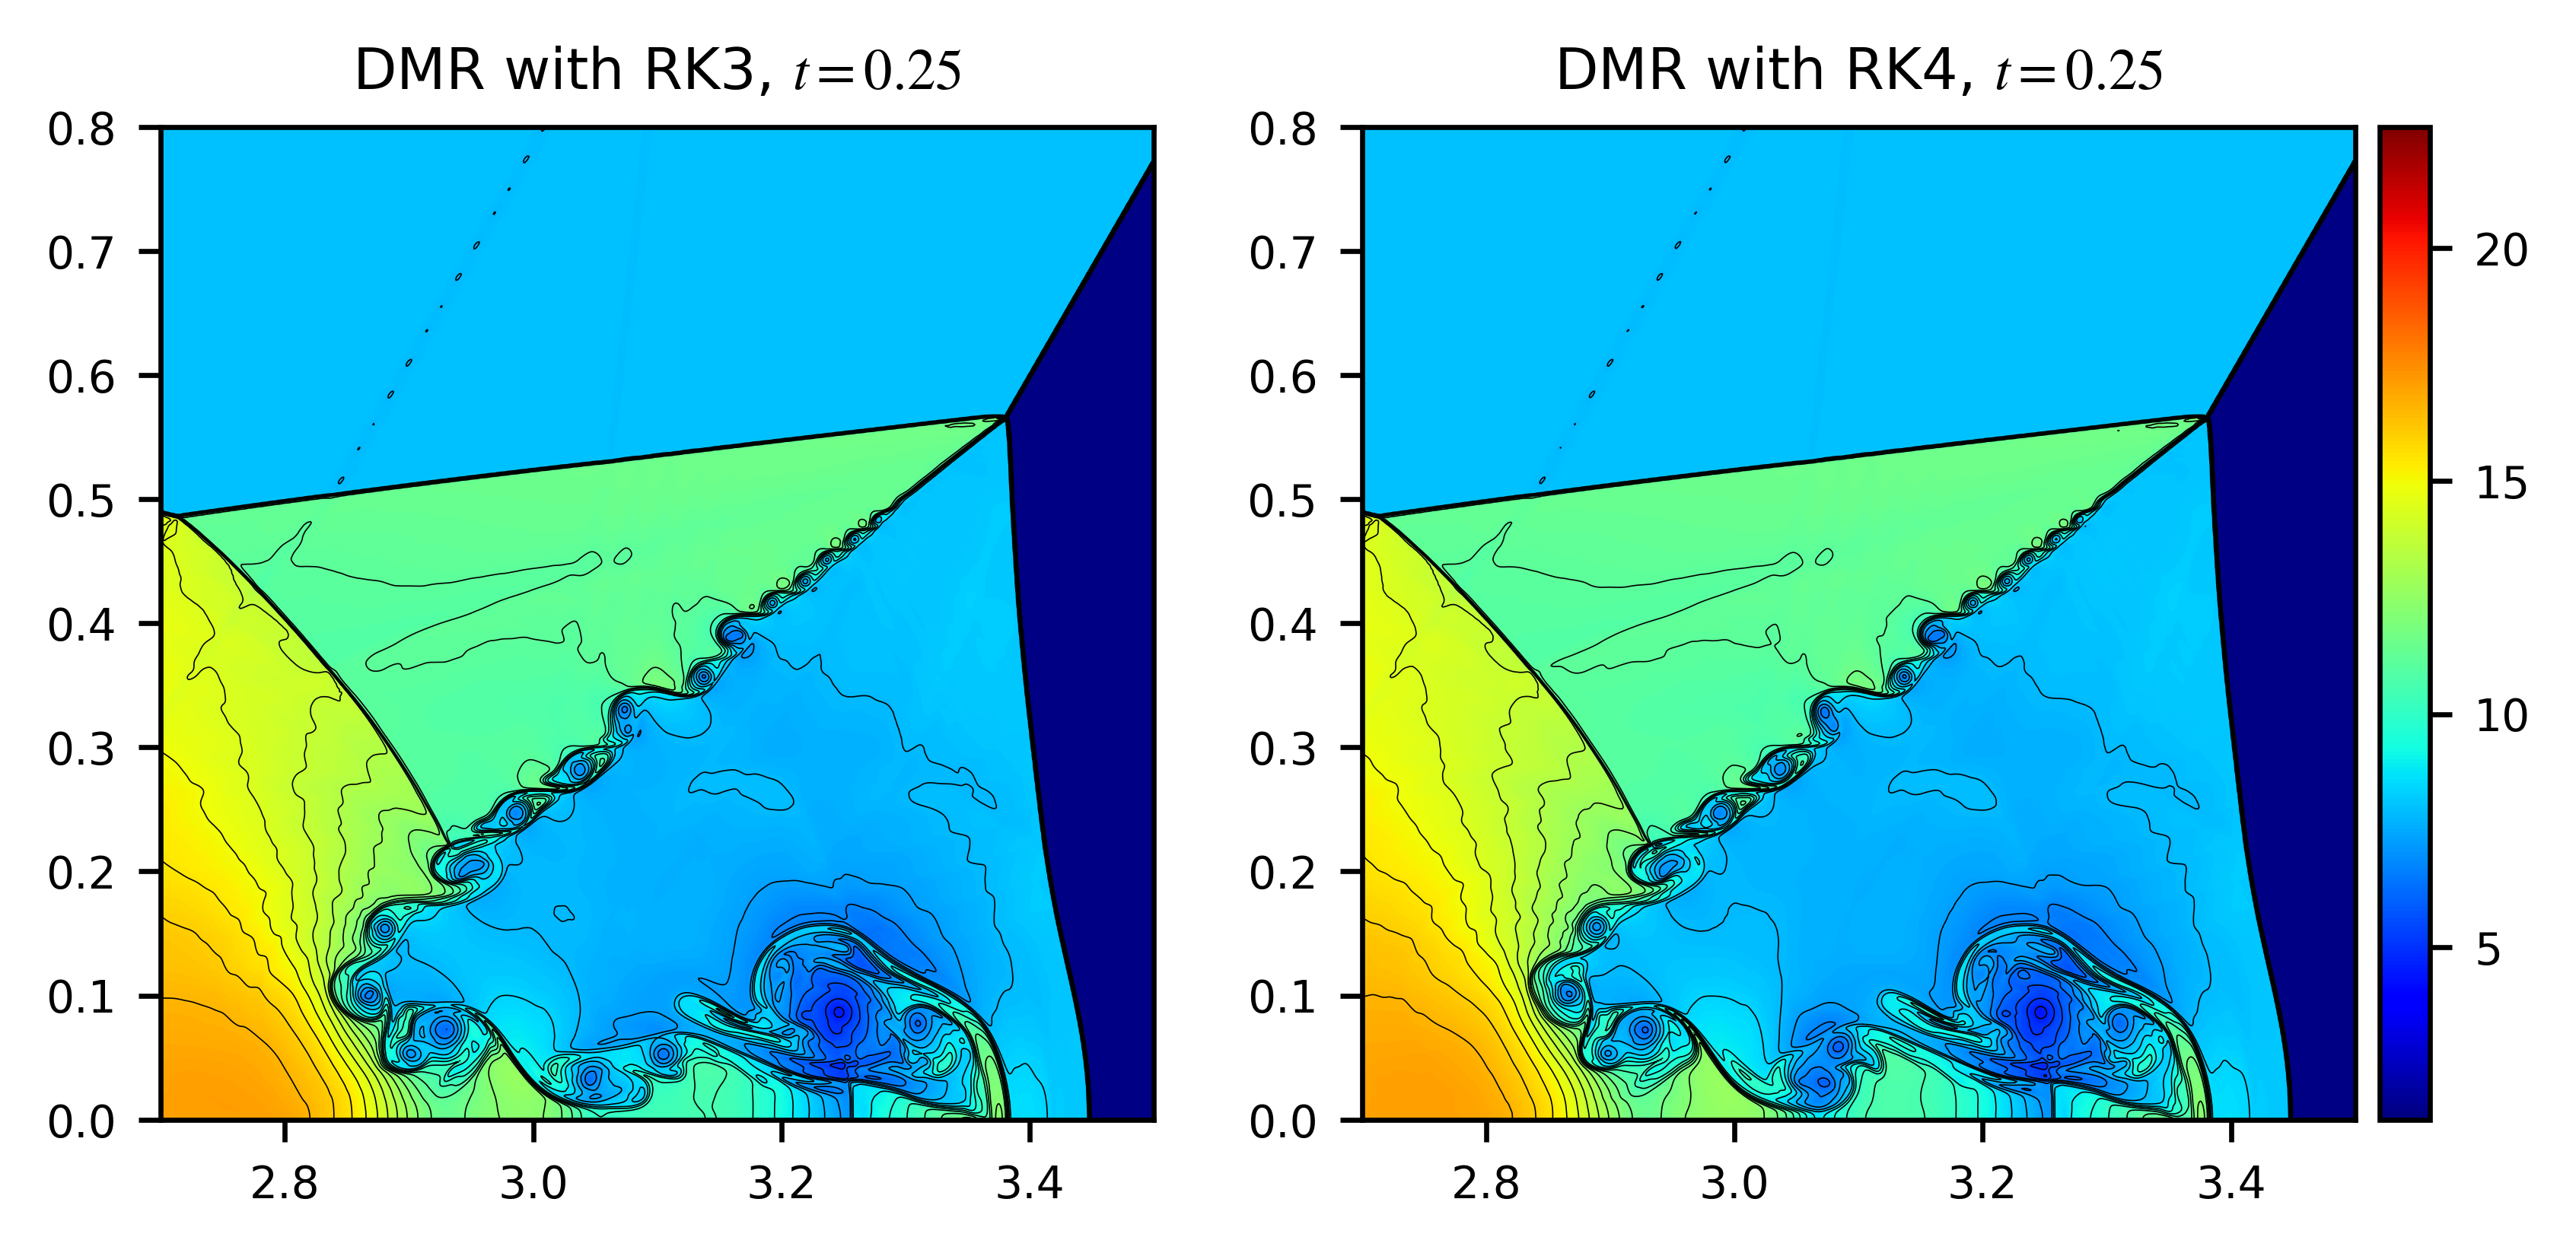

In [4]:
fig = plt.figure(figsize=(7,3), dpi=600)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

plot_cont(ax1, weno5_rk3_4096_y2, vlim, draw_cb=False)
plot_cont(ax2, weno5_rk4_4096_y2, vlim,)
ax1.set_title('DMR with RK3, $t=0.25$', fontsize=9)
ax2.set_title('DMR with RK4, $t=0.25$', fontsize=9)

for ax in [ax1, ax2]:
    ax.set_aspect(aspect=1)
    ax.set(xlim=(2.7, 3.5), ylim=(0., .8))

fig.subplots_adjust(hspace=0., wspace=0., top=0.85)

fig.savefig('./dmr_weno5_rk_4096y2.png', bbox_inches='tight', pad_inches=0)

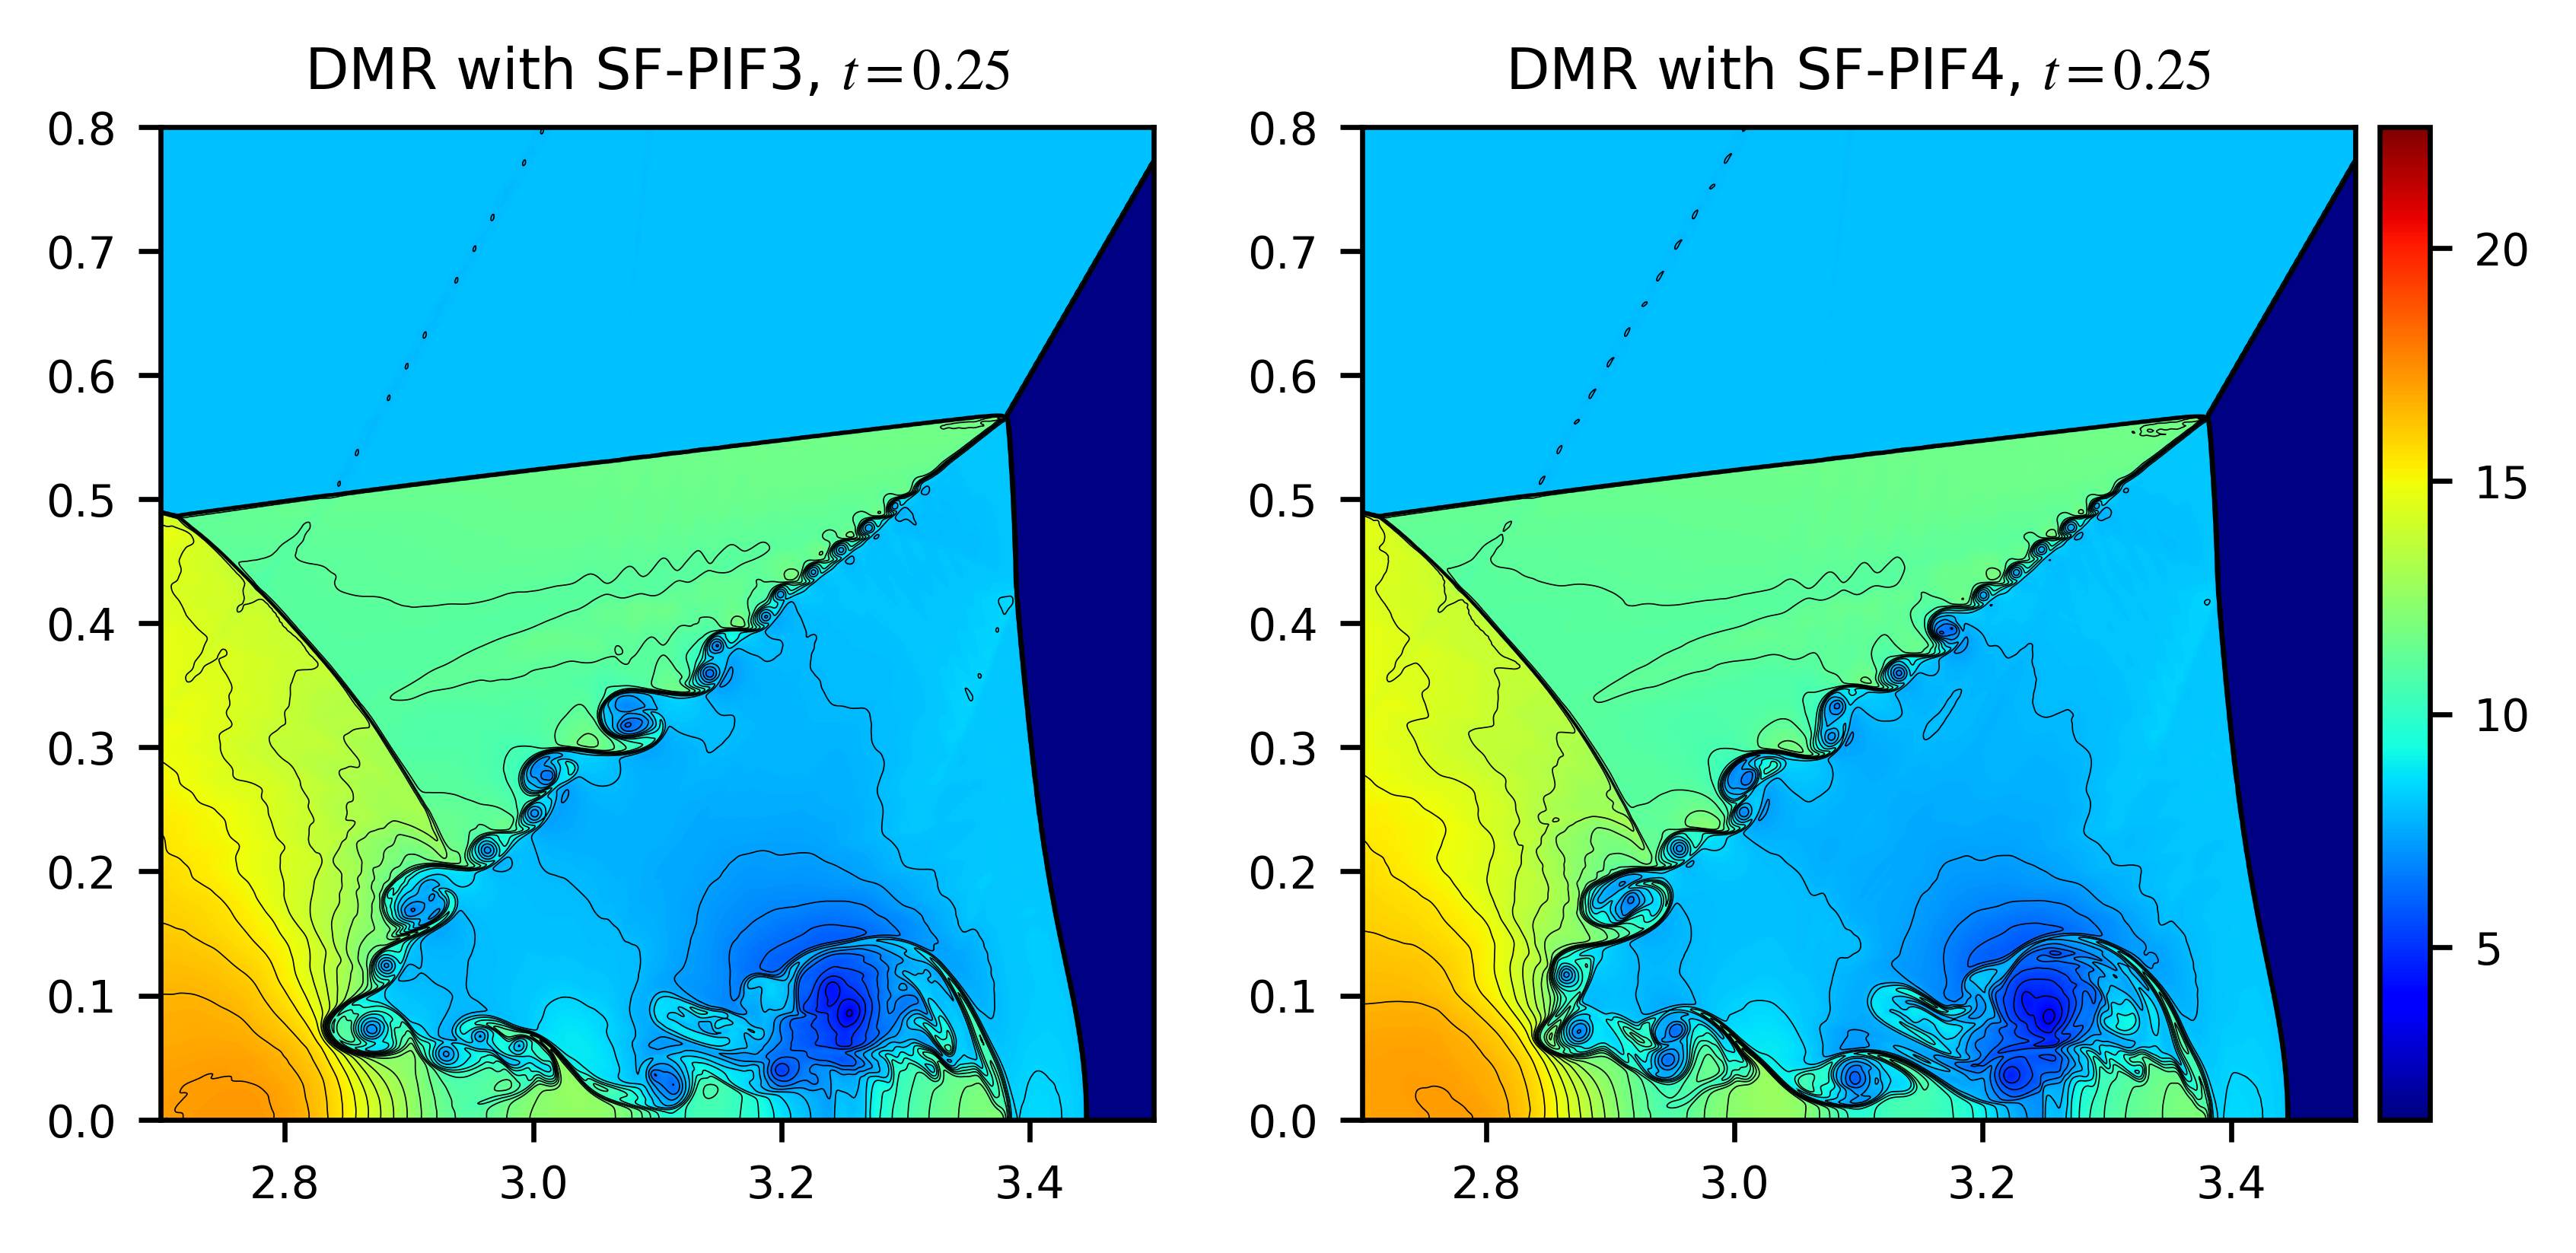

In [5]:
fig = plt.figure(figsize=(7,3), dpi=600)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

plot_cont(ax1, weno5_sf3_4096_y2, vlim, draw_cb=False)
plot_cont(ax2, weno5_sf4_4096_y2, vlim,)
ax1.set_title('DMR with SF-PIF3, $t=0.25$', fontsize=9)
ax2.set_title('DMR with SF-PIF4, $t=0.25$', fontsize=9)

for ax in [ax1, ax2]:
    ax.set_aspect(aspect=1)
    ax.set(xlim=(2.7, 3.5), ylim=(0., .8))

fig.subplots_adjust(hspace=0., wspace=0., top=0.85)

fig.savefig('./dmr_weno5_sf_4096y2.png', bbox_inches='tight', pad_inches=0)

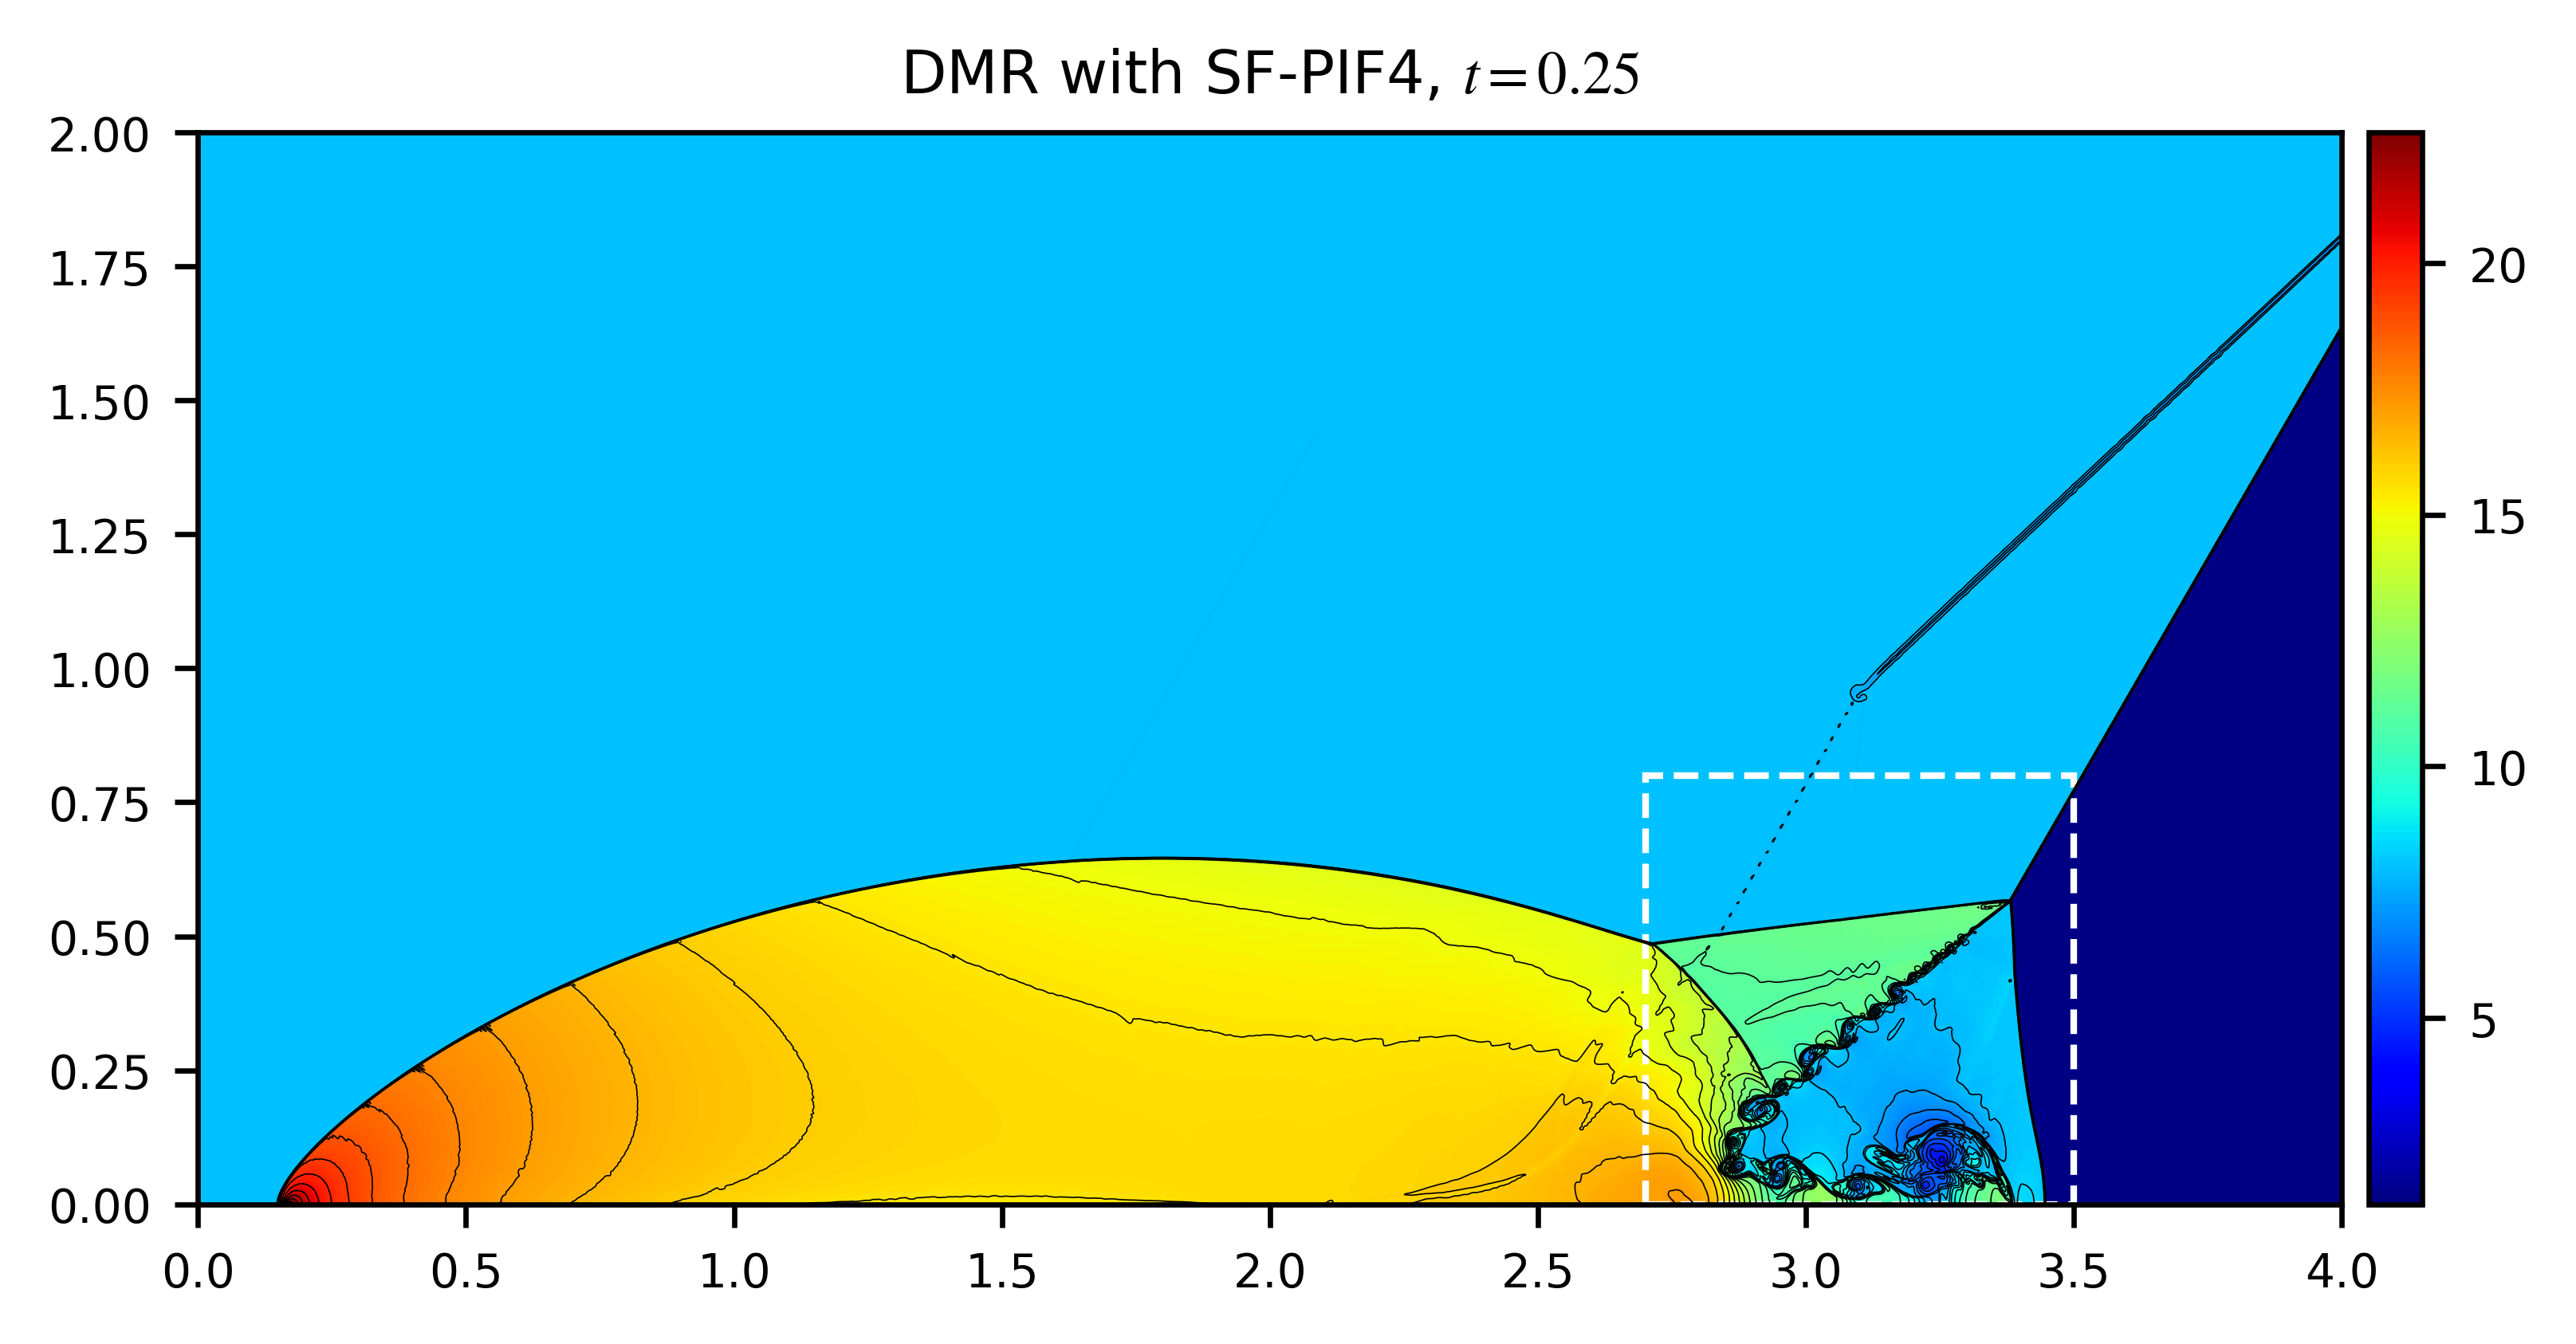

In [6]:
fig = plt.figure(figsize=(6,3), dpi=600)
ax = fig.add_subplot(1,1,1)

plot_cont(ax, weno5_sf4_4096_y2, vlim)
ax.set_title('DMR with SF-PIF4, $t=0.25$', fontsize=9)
ax.set_aspect(aspect=1)

rect = patches.Rectangle((2.7, 0), 0.8, 0.8, linewidth=1, linestyle='--', edgecolor='w', facecolor='none')
ax.add_patch(rect)

fig.savefig('./dmr_overview_sf4.png', bbox_inches='tight', pad_inches=0)